## Import Statements and Constants

In [1]:
import numpy as np
import scipy as sp
import json
import csv
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt

# Dataset constants ==============================
N = 331675   # Number of points
D = 5   # Number of (useful) features
C = 172    # Number of unique categories
mC = 1508    # Largest label coding (plus one for array creation purposes)

## Feature Visualization Class

In [86]:
class Visualize(object):
     
    def __init__(self):
        # Load test file
        csv_file = open('KickStarterData_nb.csv', encoding="utf-8")
        csv_reader = csv.reader(csv_file, delimiter=',')
        
        data_arr = np.empty((N, D + 1))    # D + 1 since need to account for the labels
        counter = -2    # For skipping the row of feature names 
        for row in csv_reader:
            counter += 1
            if (counter == -1):
                continue
                            
            temp_arr = np.array(row)
            data_arr[counter] = temp_arr[1:]    # Ignores the ID vaules
        
        # Splits the data between data points and labels
        self.x = data_arr[:, 0:D]
        self.y = data_arr[:, D]
    
    def average(self):
        goal_ratio_avg_by_cat = np.zeros((mC,))
        cat_count = np.zeros((mC,))
        axis_mask = np.ones((mC,))
        
        categories = self.x[:, 0]
        goal_ratios = self.x[:, 4]
        
        for i in range(0, N):
            curr_cat = categories[i]
            curr_goal_rat = goal_ratios[i]
            
            goal_ratio_avg_by_cat[int(curr_cat)] += curr_goal_rat
            cat_count[int(curr_cat)] += 1
            
        for i in range(0, mC):
            if (cat_count[i] == 0):
                cat_count[i] += 1    # So when divide to find average, doesn't throw div by 0 error
                axis_mask[i] -= 1    # When count is zero, set the bit value in mask to 0
        
        goal_ratio_avg_by_cat = goal_ratio_avg_by_cat / cat_count    # The y variables to plot
        goal_ratio_avg_by_cat = goal_ratio_avg_by_cat[goal_ratio_avg_by_cat != 0]
        
        unique_cats = np.linspace(1, mC, mC, dtype=int)    # The x variables to plot
        unique_cats = unique_cats * axis_mask
        unique_cats = unique_cats[unique_cats != 0]
        
        figure = plt.figure()
        axis = figure.add_axes([0,0,1,1])
        axis.xaxis.set_ticks(np.arange(200, 1600, 200))
        axis.scatter(unique_cats, goal_ratio_avg_by_cat)
        axis.set(ylabel="Ratio of Goal per Percent time", xlabel="Category Number")
        plt.figtext(0.5, -0.15, "Figure 1: A mapping of each sub-category to the average ratio of goal per percent time", ha="center", fontsize=12)
        plt.show()

    def count(self):
        num_main_cats = mC // 100
        main_cat_count = np.zeros((num_main_cats,))
        
        categories = self.x[:, 0]
        
        for cat in categories:
            curr_main_cat = cat // 100
            main_cat_count[int(curr_main_cat) - 1] += 1
        
        unique_main_cats = np.linspace(1, num_main_cats, num_main_cats, dtype=int)    # The x variables to plot
        
        figure = plt.figure()
        axis = figure.add_axes([0,0,1,1])
        axis.xaxis.set_ticks(np.arange(2, 16, 2))
        axis.bar(unique_main_cats, main_cat_count)
        axis.set(ylabel="Number of Kickstarter Projects", xlabel="Main Category Number")
        plt.figtext(0.5, -0.15, "Figure 2: The number of Kickstarter projects created in each of the main categories", ha="center", fontsize=12)
        plt.show()
        
    def feature_to_outcome_NB(self):
        list_feat_names = ["Category Number", "Number of Days in Campaign", "Number of Backers per Percent Time", "Goal in USD", "Goal Ratio per Percent Time"]
        list_axis_ticks = [np.arange(200, 1600, 200), np.arange(20, 100, 20), np.arange(200, 2200, 200), np.arange(20000000, 180000000, 20000000), np.arange(20000, 120000, 20000)]
        fig_count = 3
        for feat in range(0, D):
            curr_feats = self.x[:, feat]

            figure = plt.figure()
            axis = figure.add_axes([0,0,1,1])
            axis.xaxis.set_ticks(list_axis_ticks[feat])
            axis.yaxis.set_ticks(np.array([0, 1]))
            axis.scatter(curr_feats, self.y, marker="x")
            axis.set(ylabel="Outcome", xlabel=list_feat_names[feat])
            fig_str = "Figure " + str(fig_count) + ": A mapping of " + list_feat_names[feat] + " to the campaign outcome"
            plt.figtext(0.5, -0.15, fig_str, ha="center", fontsize=12)
            plt.show()
            
            fig_count += 1

## Feature Visualizations

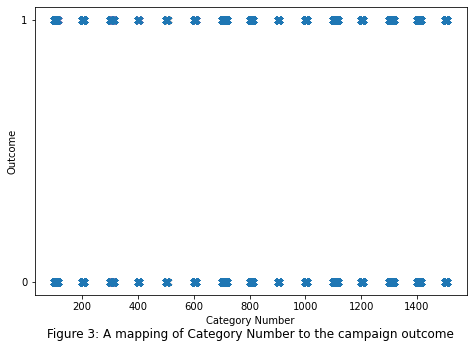

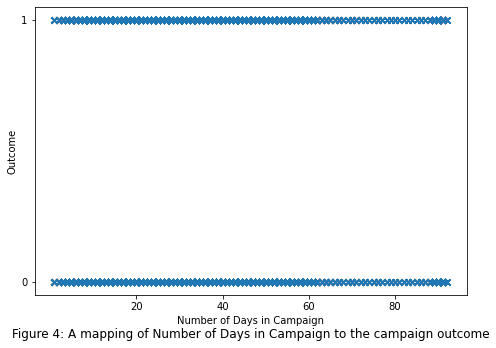

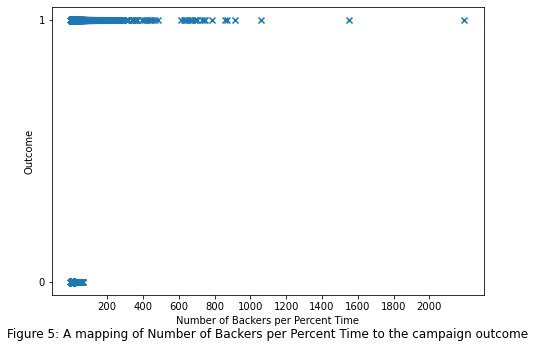

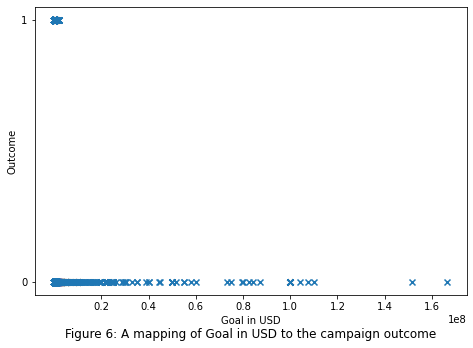

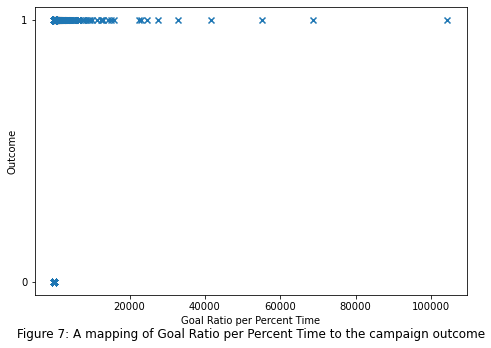

In [87]:
vis = Visualize()
vis.average()
vis.count()
vis.feature_to_outcome_NB()